In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

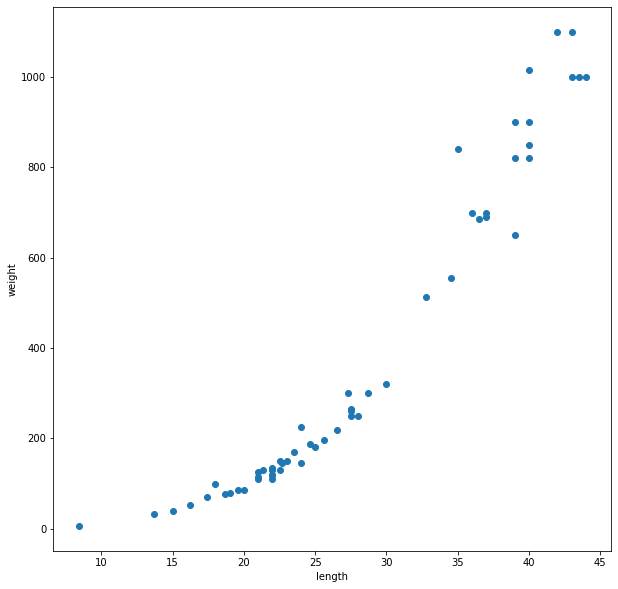

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_input, test_input,train_target,test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [ ]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [ ]:
train_input = train_input.reshape(-1,1) #-1은 전체를 다 바꾸겠다는 의미함
test_input = test_input.reshape(-1,1)

In [ ]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knr.score(test_input,test_target)

0.9928094061010639

In [ ]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(test_input,test_target))
print(knr.score(train_input, train_target))

0.974645996398761
0.9804899950518966


## 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_prediction = lr.predict(test_input)
lr_prediction

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [ ]:

print(lr.score(test_input,test_target))
print(lr.score(train_input, train_target))

0.8247503123313558
0.9398463339976039


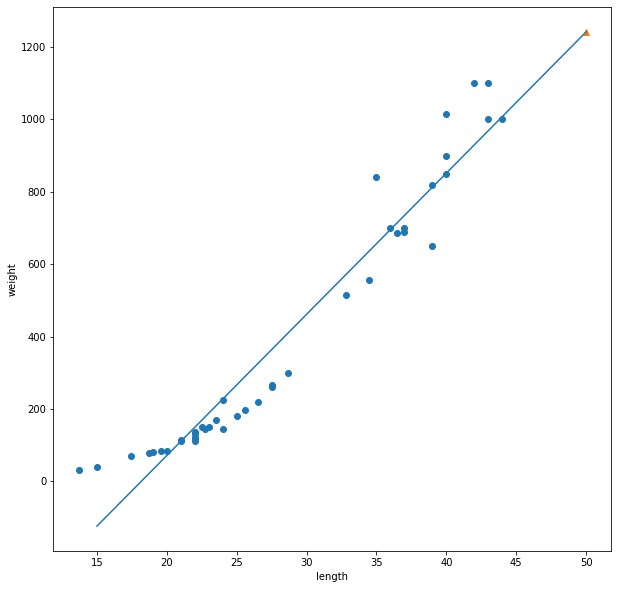

In [ ]:
#입력 데이터 x와 정답 데이터 y의 모양을 확인하는 산점도
plt.figure(figsize=(10,10))
plt.scatter(train_input, train_target)
plt.scatter(50, 1241.8, marker='^')
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 보스턴 집값데이터 예측

In [ ]:
from sklearn.datasets import load_boston
bodton_dataset = load_boston()

print(bodton_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
bodton_dataset .feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
bodton_dataset.data.shape 

(506, 13)

In [ ]:
bodton_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
import pandas as pd

In [ ]:
x = pd.DataFrame(bodton_dataset.data, columns=bodton_dataset .feature_names)
x.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [ ]:
y = pd.DataFrame(bodton_dataset.target, columns=['MEDV'])
y.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [ ]:
train_input, test_input,train_target,test_target = train_test_split(x, y, random_state = 5, test_size=0.2)

In [ ]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


In [ ]:
lr_boston = LinearRegression()

lr_boston .fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_boston_prediction = lr_boston.predict(test_input)
lr_boston_prediction

array([[37.56311787],
       [32.14445143],
       [27.06573629],
       [ 5.67080633],
       [35.09982577],
       [ 5.85803701],
       [27.53708506],
       [31.81019188],
       [26.35634771],
       [22.77208748],
       [31.91183048],
       [21.50224061],
       [23.70119983],
       [33.3622504 ],
       [28.51633591],
       [14.39456899],
       [ 0.19284025],
       [18.66247155],
       [13.71004139],
       [14.13408635],
       [ 2.03263952],
       [19.7280831 ],
       [38.18657429],
       [24.19760058],
       [31.30247973],
       [11.14144544],
       [25.03636951],
       [23.27970871],
       [22.49420127],
       [20.52972594],
       [15.16513744],
       [ 6.92553586],
       [18.3557733 ],
       [22.37179804],
       [28.91287973],
       [19.02980786],
       [30.19357214],
       [ 8.74384915],
       [40.86691522],
       [34.53763591],
       [20.70224878],
       [ 2.59618963],
       [29.99590282],
       [12.15704798],
       [27.10186397],
       [30

In [ ]:
print(lr_boston.score(test_input,test_target))
print(lr_boston.score(train_input, train_target))

0.7334492147453064
0.738339392059052
